In [13]:
# Import library

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')
import pylab
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [14]:
JKSE = yf.Ticker('^JKSE')
hist = JKSE.history(period="1y", auto_adjust=True)
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-10-18 00:00:00+07:00,6939.615234,6968.254883,6908.286133,6927.905762,187464900,0.0,0.0
2023-10-19 00:00:00+07:00,6927.632812,6927.980957,6840.365234,6846.426758,205941400,0.0,0.0
2023-10-20 00:00:00+07:00,6846.426758,6869.474121,6803.192871,6849.167969,194064800,0.0,0.0
2023-10-23 00:00:00+07:00,6849.167969,6853.449219,6730.875977,6741.963867,168543100,0.0,0.0
2023-10-24 00:00:00+07:00,6741.828125,6826.048828,6738.533203,6806.762207,141478700,0.0,0.0


In [15]:
hist_df = hist[["Close"]]
hist_df.head()

,Close
Date,
2023-10-18 00:00:00+07:00,6927.905762
2023-10-19 00:00:00+07:00,6846.426758
2023-10-20 00:00:00+07:00,6849.167969
2023-10-23 00:00:00+07:00,6741.963867
2023-10-24 00:00:00+07:00,6806.762207


In [16]:
hist_df.index = pd.to_datetime(hist_df.index)
hist_df.index = hist_df.index.date
hist_df.index = pd.to_datetime(hist_df.index)

In [17]:
hist_df

,Close
2023-10-18,6927.905762
2023-10-19,6846.426758
2023-10-20,6849.167969
2023-10-23,6741.963867
2023-10-24,6806.762207
...,...
2024-10-14,7559.654785
2024-10-15,7626.951172
2024-10-16,7648.939941
2024-10-17,7735.039062


In [18]:
hist_df = hist_df.loc["2023-11-01":"2024-09-30"]

In [19]:
hist_df

,Close
2023-11-01,6642.417969
2023-11-02,6751.386230
2023-11-03,6788.850098
2023-11-06,6878.835938
2023-11-07,6843.790039
...,...
2024-09-24,7778.491211
2024-09-25,7740.901855
2024-09-26,7744.516113
2024-09-27,7696.916016


In [20]:
train = hist_df[0:150]
test = hist_df[150:]
train.head()

,Close
2023-11-01,6642.417969
2023-11-02,6751.386230
2023-11-03,6788.850098
2023-11-06,6878.835938
2023-11-07,6843.790039


In [21]:
test

,Close
2024-06-28,7063.577148
2024-07-01,7139.625977
2024-07-02,7125.142090
2024-07-03,7196.754883
2024-07-04,7220.889160
...,...
2024-09-24,7778.491211
2024-09-25,7740.901855
2024-09-26,7744.516113
2024-09-27,7696.916016


In [27]:
# Convert index to datetime if it's not already
hist_df.index = pd.to_datetime(hist_df.index)

# Reset the index and convert the date
hist_df = hist_df.reset_index()
hist_df['index'] = hist_df['index'].dt.date

# Optionally set the index back if needed
hist_df.set_index('index', inplace=True)

Text(0, 0.5, 'Closing Stock')

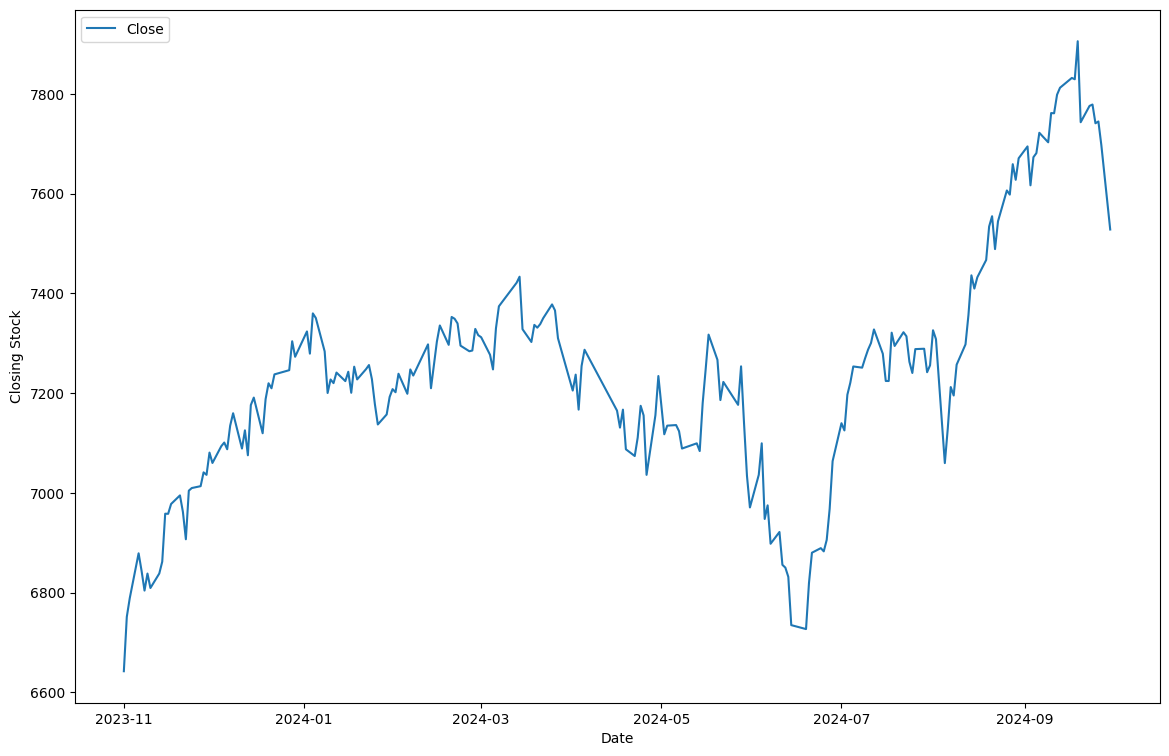

In [28]:
hist_df.plot()
plt.xlabel('Date')
plt.ylabel('Closing Stock')

In [30]:
hist_df.index = pd.to_datetime(hist_df.index).date
pylab.rcParams['figure.figsize'] = (14, 9)
res = seasonal_decompose(hist_df['Close'], model='additive')
ax=res.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None